In [1]:
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from te import transfer_entropy
from tegpt import transfer_entropy as transfer_entropy_gpt

In [2]:
def calc_rr_map_sap(
    signal: np.array,
    sampling_rate: int = 200,
    mindelay: float = 0.3,
) -> dict[np.array]:
    cleaned_signal = nk.ppg_clean(signal, sampling_rate=sampling_rate, method="elgendi")
    peaks_info = nk.ppg_findpeaks(
        cleaned_signal, sampling_rate=sampling_rate, method="elgendi", mindelay=mindelay
    )
    peaks = peaks_info["PPG_Peaks"]
    rr = np.diff(peaks) / sampling_rate * 1000
    sap = np.array([signal[peak] for peak in peaks])[1:]
    map = np.array([np.mean(signal[peaks[i-1]:peaks[i]]) for i, _ in enumerate(peaks) if i > 0])

    # plot peaks on the signal
    plt.figure()
    plt.plot(signal)
    plt.scatter(peaks, signal[peaks], color="red")

    return {"RR": rr, "SAP": sap, "MAP": map}

In [3]:
on = 14
abp_signal = pd.read_csv(f'data/CONTROL_BREATHING_RECORDINGS/OCHOTNIK_{on}/CLEAN_DATA/OCH_{on}_CLEAN_CB.csv', sep=';', decimal=',')['abp_cnap[mmHg]'].values
abp_signal

array([ 89.84,  89.84,  89.84, ..., 103.5 , 103.5 , 103.5 ],
      shape=(185101,))

{'RR': array([700., 640., 625., ..., 715., 745., 755.], shape=(1323,)),
 'SAP': array([107.4, 108.9, 107.4, ..., 112.8, 112.8, 112.3], shape=(1323,)),
 'MAP': array([94.55471429, 98.3646875 , 98.5392    , ..., 93.41664336,
        92.92563758, 92.28940397], shape=(1323,))}

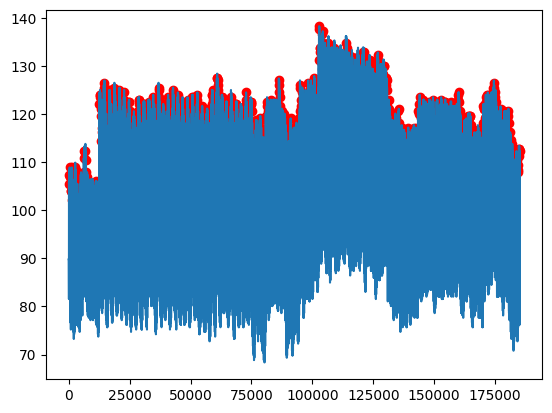

In [4]:
signals = calc_rr_map_sap(abp_signal)
signals

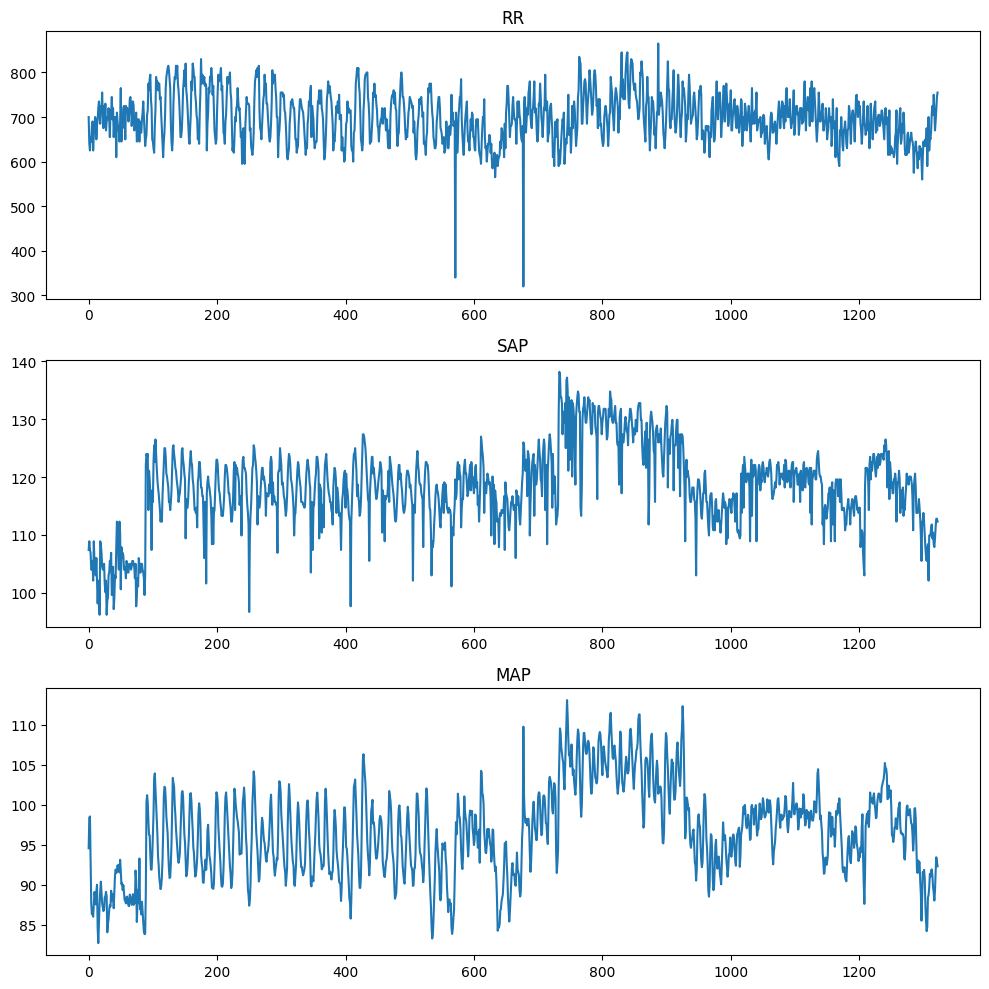

In [5]:
# make figure that has 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# plot RR
axs[0].plot(signals["RR"])
axs[0].set_title("RR")

# plot SAP
axs[1].plot(signals["SAP"])
axs[1].set_title("SAP")

# plot MAP
axs[2].plot(signals["MAP"])
axs[2].set_title("MAP")

plt.tight_layout()
plt.show()

In [6]:
transfer_entropy(signals["RR"], signals["SAP"])

np.float64(1.334230039886963)

In [7]:
transfer_entropy(signals["RR"], signals["MAP"])

np.float64(1.1290382083222432)

In [15]:
transfer_entropy_gpt(signals["RR"], signals["MAP"])

0